<a target="_blank" href="https://colab.research.google.com/github/BenjaminHerrera/MAT421/blob/main/herrera_module_J.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **MODULE J:** Ordinary Differential Equations, Part I
# **AUTHOR:** Benjamin Joseph L. Herrera
# **CLASS:** MAT 421
# **DATE:** 31 MAR 2024

## ⚠️ Run these commands prior to running anything

In [2]:
!pip install numpy as np 
!pip install scipy
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


## The Problem

As we all know, a differential equation is a function's relation to a variable and its derivatives. When it comes to odinary differential equations (ODE), a function is taken with respect to just one variable. For example, consider a pendulum with an angle $\theta$, length of the string $r$, and a mass at the end of the string $w$. We can define the angle of the pendulum as time goes by via the function $\Theta(t)$. When you account gravity to the scenario with this function, you can get an ODE of:

$$w\cdot r \frac{d^2 \Theta(t)}{dt^2} = - w \cdot g \cdot \sin(\Theta(t))$$

We also have something called partial differential euqations (PDE). Unlike an ODE, PDEs are respective to all inputs of a function. Here's an example to this:

$$\frac{\partial^2 u}{\partial t^2} = C \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right)$$

Above is an example of a PDE that defines the wave equation of a vibrating membrane

There are general solutions to differential equations. However, these solutions are very hard to find. For ODEs of order $n$, a particular solution $p(x)$ to an ODE satisfies the differential equation and $n$ knwn values of the solution or derivatives. The particular solution must ssatisfy the notion of: $p^{(j)}(x_i) = p_i$ where $j$ is the $j^{th}$ derivative of $p$ for $n$ number of tuples $(j, x_i, p_i)$ 

Going back to the pendulum problem, we can define the time function as

$$\Theta(t) = \cos(\sqrt{\frac{g}{t} \cdot t})$$

We can reduce the ODE of the pendulum problem to

$$r \cdot \frac{d^2 \Theta(t)}{dt^2} = - g \cdot \Theta(t)$$

By plugging the newly define time equation, we get 

$$\frac{d^2 \Theta(t)}{dt^2} = - \frac{g}{r} \cdot \cos(\sqrt{\frac{g}{r}}\cdot t)$$

when we also take its second derivative

We can then check that this definition is the partial solution (a.k.a. solution for brevity) of the equation because if we plug this into the original ODE we can see it is the same.

## Reduction of Order

To solve a differential equation, we must reduce its order. This is similar to what we did to the pendulum problem from the previous section. To do so, we must define a state vector $S(t)$.

$$S(t) = \begin{bmatrix}
f(t) \\
f^{(1)}(t) \\
\dots \\f^{(n-1)}(t) \\
\end{bmatrix}$$

The derivative of this state function is

$$\frac{dS}{dt} = \begin{bmatrix}
S_2(t) \\
S_3(t) \\
\dots \\ 
F(t, S_1(t), S_2(t), \dots, S_{n-1}(t)) \\
\end{bmatrix}$$

where $i$ is the ith element of $S(t)$. Here, we have turned nth order ODE into $n$ first order ODEs together. This is also known as coupling.

Going back to the pendulum example, we can reduce the second order pendulum to first order via the following steps

$$S(t) = \begin{bmatrix}
\Theta(t) \\
\Theta(t) \\
\end{bmatrix}$$

$$\frac{dS}{dt} = \begin{bmatrix}
S_2(t) \\
-\frac{g}{r}S_1(t) \\
\end{bmatrix}$$

$$\frac{dS}{dt} = \begin{bmatrix}
0 & 1 \\
-\frac{g}{r} & 0 \\
\end{bmatrix}  S(t)$$

This reduction also created a linear ODE. 

## The Euler Methd

Let an ODE be defined as

$$\frac{dS}{dt} = F(t, S(t))$$

We also define the the range of $t$ as $[t_0, t_f] = [0, C \cdot h]$ where $C$ is some positive integer and $h$ is the equal spacing between $t_i$ and $t_{i+1}$

When linearly approximating $S(t)$, we get

$$S(t_{j+1}) = S(t_j) + (t_{j+1} - t_j) \frac{dS}{dt} = S(t_j) + h\cdot F(t_j, S(t_j))$$

which is called the Explicit Euler Formula. This formulation allows for an approximationfor the state function at state $S(t_{j+1})$

Let's see this in action with the differential equation $\frac{df}{dt} = \sin(t)$

In [16]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Calculations
func = lambda t, s: np.sin(t)
interval = 0.1
time = np.arange(0, 1 + interval, interval)
first_state = -1
state_func = np.zeros(len(time))
state_func[0] = first_state
for i in range(0, len(time) - 1):
    state_func[i + 1] = state_func[i] + interval*func(time[i], state_func[i])


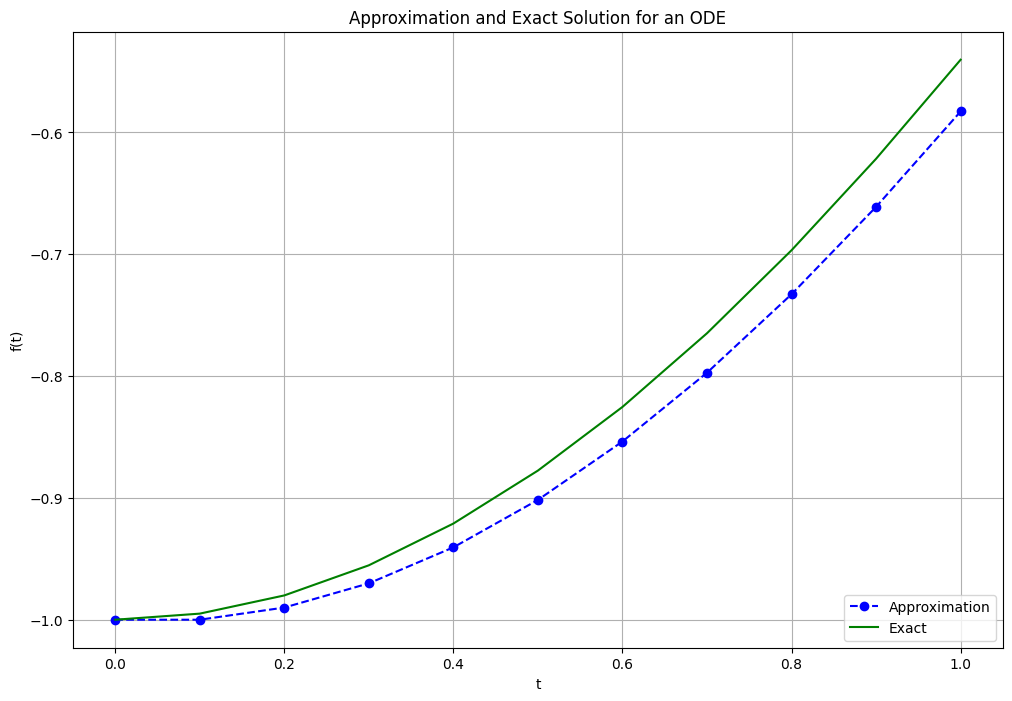

In [48]:
# Plot the graph
plt.figure(figsize = (12, 8))
plt.plot(time, state_func, 'bo--', label='Approximation')
plt.plot(time, -np.cos(time), 'g', label='Exact')
plt.title('Approximation and Exact Solution for an ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

When we decrease the spacing, we get a better fit to the function

In [49]:
# Calculations
func = lambda t, s: np.sin(t)
interval = 0.01
time = np.arange(0, 1 + interval, interval)
first_state = -1
state_func = np.zeros(len(time))
state_func[0] = first_state
for i in range(0, len(time) - 1):
    state_func[i + 1] = state_func[i] + interval*func(time[i], state_func[i])

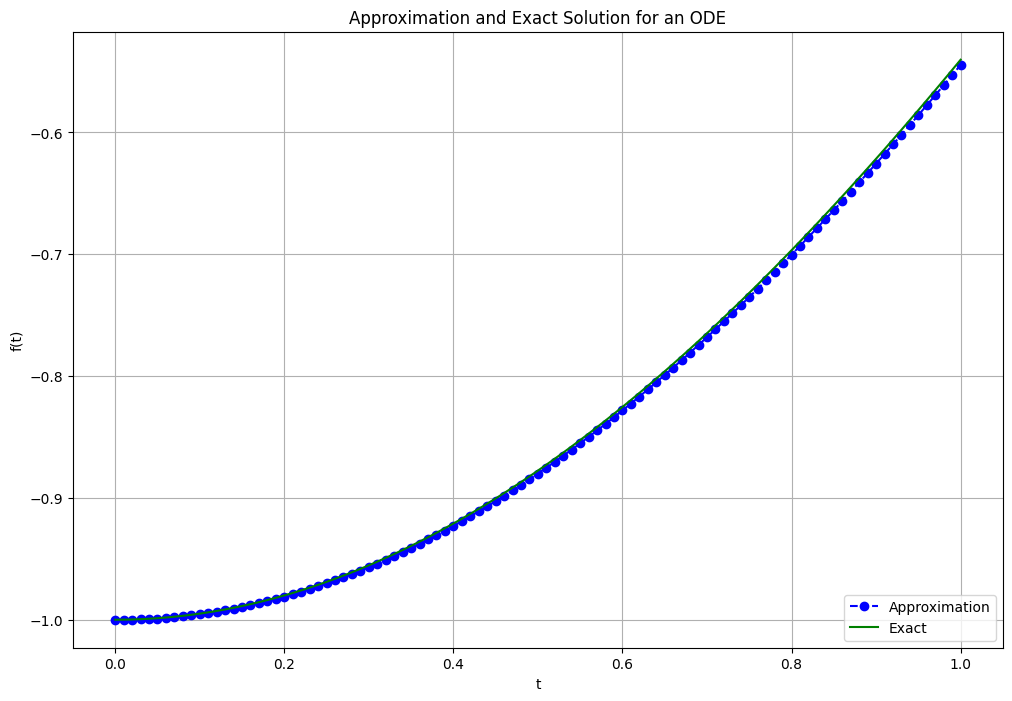

In [50]:
# Plot the graph
plt.figure(figsize = (12, 8))
plt.plot(time, state_func, 'bo--', label='Approximation')
plt.plot(time, -np.cos(time), 'g', label='Exact')
plt.title('Approximation and Exact Solution for an ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()